In [4]:
# Load the data
import os
from sklearn import preprocessing, metrics

# Parameters
do_grid_search_cv = True
do_pca = False
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the CSV file and convert "?" to NaN

original_data = pd.read_csv('C:/Users/Mirela/PycharmProjects/House to rent/brasilian-houses-to-rent/houses_to_rent_v2.csv',
                            names=['city','area','rooms','bathroom','parking spaces','floor','animal','furniture','hoa (R$)','rent amount (R$)','property tax (R$)','fire insurance (R$)','total (R$)'
], sep=r'\s*,\s*',
                            engine='python',
                            na_values="?")

print(original_data.head())
print(original_data.dtypes)

print(original_data.isna().sum())
original_data = original_data.dropna()
print(original_data.head())


           city  area  rooms  bathroom  parking spaces  floor  animal  \
0          city  area  rooms  bathroom  parking spaces  floor  animal   
1    SÃ£o Paulo    70      2         1               1      7   acept   
2    SÃ£o Paulo   320      4         4               0     20   acept   
3  Porto Alegre    80      1         1               1      6   acept   
4  Porto Alegre    51      2         1               0      2   acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furniture  hoa (R$)  rent amount (R$)  property tax (R$)   
1      furnished      2065              3300                211   
2  not furnished      1200              4960               1750   
3  not furnished      1000              2800                  0   
4  not furnished       270              1112                 22   

   fire insurance (R$)  total (R$)  
0  fire insurance (R$)  total (R$)  
1                   42        5618  
2                   63        7973  
3         

In [5]:
# Encode the categorical features as numbers
result = original_data.copy()
encoders = {}
for column in result.columns:

    if result.dtypes[column] == pd.np.object:
        encoders[column] = preprocessing.LabelEncoder()
        result[column] = encoders[column].fit_transform(result[column])

features = result
feature_names = features.columns.get_values()
print(features.head())

   city  area  rooms  bathroom  parking spaces  floor  animal  furniture  \
0     5   517     11        10              11     35       1          1   
1     4   463      3         0               1     32       0          0   
2     4   243      5         4               0     13       0          2   
3     2   481      0         0               1     31       0          2   
4     2   398      3         0               0     12       0          2   

   hoa (R$)  rent amount (R$)  property tax (R$)  fire insurance (R$)  \
0      1679              1195               1243                  216   
1       576               639                404                  151   
2       133               835                320                  175   
3         4               549                  0                  150   
4       787                61                423                   75   

   total (R$)  
0        5751  
1        4155  
2        5046  
3        3102  
4         700  


In [6]:
labels = np.array(features['rent amount (R$)']) # Create an array.

# Remove the labels from the features
# axis 1 refers to the columns

features = features.drop('rent amount (R$)', axis=1) #  Remove columns by specifying label names and coresponding axis

In [7]:
# data normalization
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
features = normalizer.fit_transform(features)

In [8]:
# Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split

# Split data into random train and test subsets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2,
                                                                            random_state=42)
# returns list containing train-test split of inputs.

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (8554, 12)
Training Labels Shape: (8554,)
Testing Features Shape: (2139, 12)
Testing Labels Shape: (2139,)


In [9]:
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout

# define the model
def larger_model():
    # create model
    dropout = 0.05
    model = Sequential()
    model.add(Dense(64,kernel_initializer='uniform', activation='relu',input_shape=(train_features.shape[1],)))
    model.add(Dropout(rate=dropout))
    model.add(Dense(64,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate=dropout))
    model.add(Dense(1,kernel_initializer='uniform'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Using TensorFlow backend.


In [10]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=4, random_state=seed)
results = cross_val_score(pipeline, train_features, train_labels, cv=kfold, n_jobs=1)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))
pipeline.fit(train_features, train_labels)
print(pipeline.score(test_features,test_labels))
test_predictions = pipeline.predict(test_features).flatten()
print(test_predictions.shape)


Larger: -31656.15 (1621.05) MSE
-28592.93343633979


(2139,)

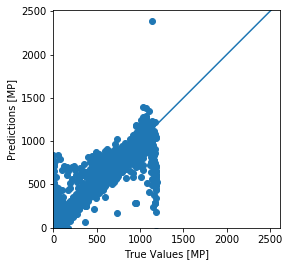

In [11]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [rent amount]')
plt.ylabel('Predictions [rent amount]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 20000], [-100, 20000])


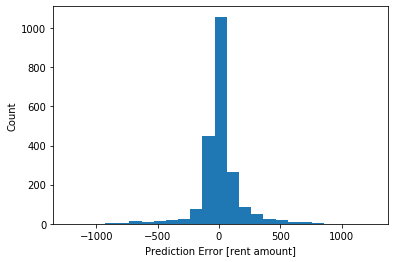

In [12]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [rent amount]")
_ = plt.ylabel("Count")

Conclusions:

The evaluation metrics available for regression models are: Mean Absolute Error, Root Mean Absolute Error, Relative Absolute Error, Relative Squared Error, and the Coefficient of Determination.
The term "error" here represents the difference between the predicted value and the true value. The absolute value or the square of this difference is usually computed to capture the total magnitude of error across all instances, as the difference between the predicted and true value could be negative in some cases. The error metrics measure the predictive performance of a regression model in terms of the mean deviation of its predictions from the true values. Lower error values mean the model is more accurate in making predictions. An overall error metric of zero means that the model fits the data perfectly.
